In [21]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from statsmodels.tsa.stattools import adfuller
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [69]:
df = pd.read_csv('combined.csv', parse_dates= {"Date" : ["Year","Month","Day"]})
df.drop(df.columns[1], axis=1, inplace=True)
df.drop(["Station", "Highest 30 Min Rainfall (mm)", "Highest 60 Min Rainfall (mm)", "Highest 120 Min Rainfall (mm)"], axis=1, inplace=True)

# may improve prediction - to test
df['Month'] = pd.DatetimeIndex(df["Date"]).month

df

Date  Daily Rainfall Total (mm)  Mean Temperature (°C)  \
0    2019-04-01                       19.8                   27.0   
1    2019-04-02                        0.0                   27.9   
2    2019-04-03                       15.6                   26.8   
3    2019-04-04                        9.6                   28.2   
4    2019-04-05                        3.4                   27.6   
5    2019-04-06                        0.2                   28.2   
6    2019-04-07                        0.0                   28.7   
7    2019-04-08                        2.2                   28.5   
8    2019-04-09                       13.4                   28.1   
9    2019-04-10                        0.2                   28.0   
10   2019-04-11                        0.0                   27.7   
11   2019-04-12                        0.0                   28.5   
12   2019-04-13                        0.0                   29.5   
13   2019-04-14                       12.4                   27.5   
14   2019-04-15                        0.0                   29.2   
15   2019-04-16                        4.8                   29.1   
16   2019-04-17                        0.0                   29.7   
17   2019-04-18                        0.0                   29.6   
18   2019-04-19                        1.6                   28.9   
19   2019-04-20                        3.0                   27.5   
20   2019-04-21                        0.0                   28.6   
21   2019-04-22                        0.2                   28.6   
22   2019-04-23                       41.4                   26.9   
23   2019-04-24                        0.0                   27.9   
24   2019-04-25                        5.0                   27.8   
25   2019-04-26                       33.0                   25.5   
26   2019-04-27                        8.4                   27.2   
27   2019-04-28                        0.0                   28.6   
28   2019-04-29                        1.2                   28.3   
29   2019-04-30                        0.0                   28.0   
30   2020-04-01                        0.0                   29.2   
31   2020-04-02                       17.0                   28.2   
32   2020-04-03                       38.6                   27.5   
33   2020-04-04                        4.0                   28.1   
34   2020-04-05                        3.0                   27.4   
35   2020-04-06                        4.6                   26.9   
36   2020-04-07                       71.8                   26.7   
37   2020-04-08                       23.4                   27.6   
38   2020-04-09                        0.2                   28.6   
39   2020-04-10                        0.0                   28.7   
40   2020-04-11                        0.0                   28.6   
41   2020-04-12                        0.2                   28.4   
42   2020-04-13                        2.6                   27.6   
43   2020-04-14                        0.0                   29.1   
44   2020-04-15                        0.0                   29.3   
45   2020-04-16                        0.0                   29.3   
46   2020-04-17                        0.0                   29.4   
47   2020-04-18                        6.4                   28.9   
48   2020-04-19                        0.0                   30.1   
49   2020-04-20                        0.0                   30.0   
50   2020-04-21                       12.2                   28.4   
51   2020-04-22                        0.2                   29.2   
52   2020-04-23                        8.0                   27.6   
53   2020-04-24                       67.2                   26.8   
54   2020-04-25                       15.8                   26.9   
55   2020-04-26                        0.2                   26.6   
56   2020-04-27                        7.8                   26.6   
57   2020

In [71]:
# data cleaning
df = df.replace('-', np.nan)
df["Mean Wind Speed (km/h)"] = df["Mean Wind Speed (km/h)"].astype(float)
df["Max Wind Speed (km/h)"] = df["Max Wind Speed (km/h)"].astype(float)
df['Month'].astype('category')
for col in df.columns:
    df[col] = df[col].replace(np.nan, df[col].mean())
df

Date  Daily Rainfall Total (mm)  Mean Temperature (°C)  \
0    2019-04-01                       19.8                   27.0   
1    2019-04-02                        0.0                   27.9   
2    2019-04-03                       15.6                   26.8   
3    2019-04-04                        9.6                   28.2   
4    2019-04-05                        3.4                   27.6   
5    2019-04-06                        0.2                   28.2   
6    2019-04-07                        0.0                   28.7   
7    2019-04-08                        2.2                   28.5   
8    2019-04-09                       13.4                   28.1   
9    2019-04-10                        0.2                   28.0   
10   2019-04-11                        0.0                   27.7   
11   2019-04-12                        0.0                   28.5   
12   2019-04-13                        0.0                   29.5   
13   2019-04-14                       12.4                   27.5   
14   2019-04-15                        0.0                   29.2   
15   2019-04-16                        4.8                   29.1   
16   2019-04-17                        0.0                   29.7   
17   2019-04-18                        0.0                   29.6   
18   2019-04-19                        1.6                   28.9   
19   2019-04-20                        3.0                   27.5   
20   2019-04-21                        0.0                   28.6   
21   2019-04-22                        0.2                   28.6   
22   2019-04-23                       41.4                   26.9   
23   2019-04-24                        0.0                   27.9   
24   2019-04-25                        5.0                   27.8   
25   2019-04-26                       33.0                   25.5   
26   2019-04-27                        8.4                   27.2   
27   2019-04-28                        0.0                   28.6   
28   2019-04-29                        1.2                   28.3   
29   2019-04-30                        0.0                   28.0   
30   2020-04-01                        0.0                   29.2   
31   2020-04-02                       17.0                   28.2   
32   2020-04-03                       38.6                   27.5   
33   2020-04-04                        4.0                   28.1   
34   2020-04-05                        3.0                   27.4   
35   2020-04-06                        4.6                   26.9   
36   2020-04-07                       71.8                   26.7   
37   2020-04-08                       23.4                   27.6   
38   2020-04-09                        0.2                   28.6   
39   2020-04-10                        0.0                   28.7   
40   2020-04-11                        0.0                   28.6   
41   2020-04-12                        0.2                   28.4   
42   2020-04-13                        2.6                   27.6   
43   2020-04-14                        0.0                   29.1   
44   2020-04-15                        0.0                   29.3   
45   2020-04-16                        0.0                   29.3   
46   2020-04-17                        0.0                   29.4   
47   2020-04-18                        6.4                   28.9   
48   2020-04-19                        0.0                   30.1   
49   2020-04-20                        0.0                   30.0   
50   2020-04-21                       12.2                   28.4   
51   2020-04-22                        0.2                   29.2   
52   2020-04-23                        8.0                   27.6   
53   2020-04-24                       67.2                   26.8   
54   2020-04-25                       15.8                   26.9   
55   2020-04-26                        0.2                   26.6   
56   2020-04-27                        7.8                   26.6   
57   2020

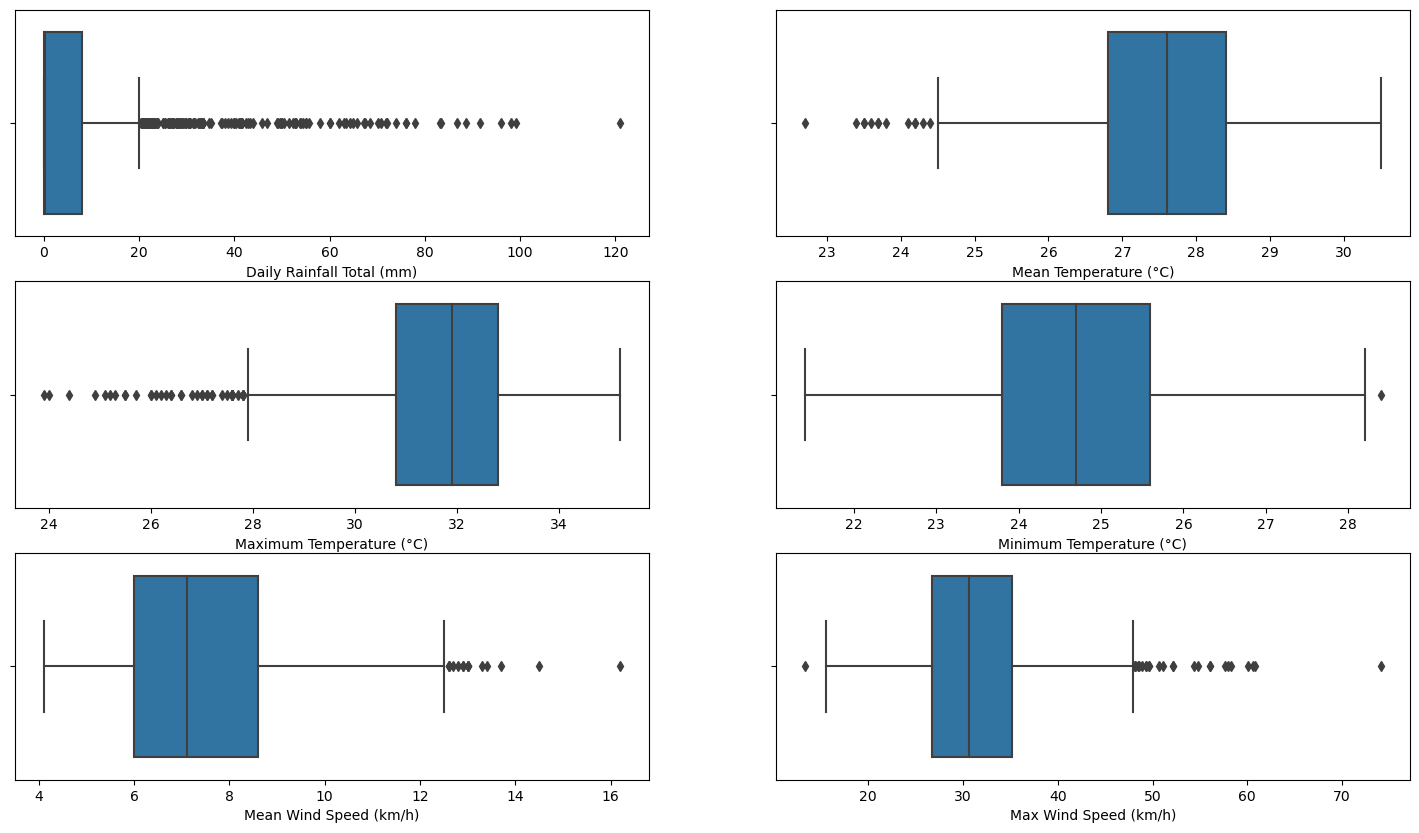

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,10))
for i in range(6):
    sns.boxplot(x=df.iloc[:, i+1], ax=axes[i//2, i%2])
plt.show()

In [73]:
# normalising output - to ask TA if this is a logical idea
df["Daily Rainfall Total (mm)"] = np.log10(df["Daily Rainfall Total (mm)"]+1)

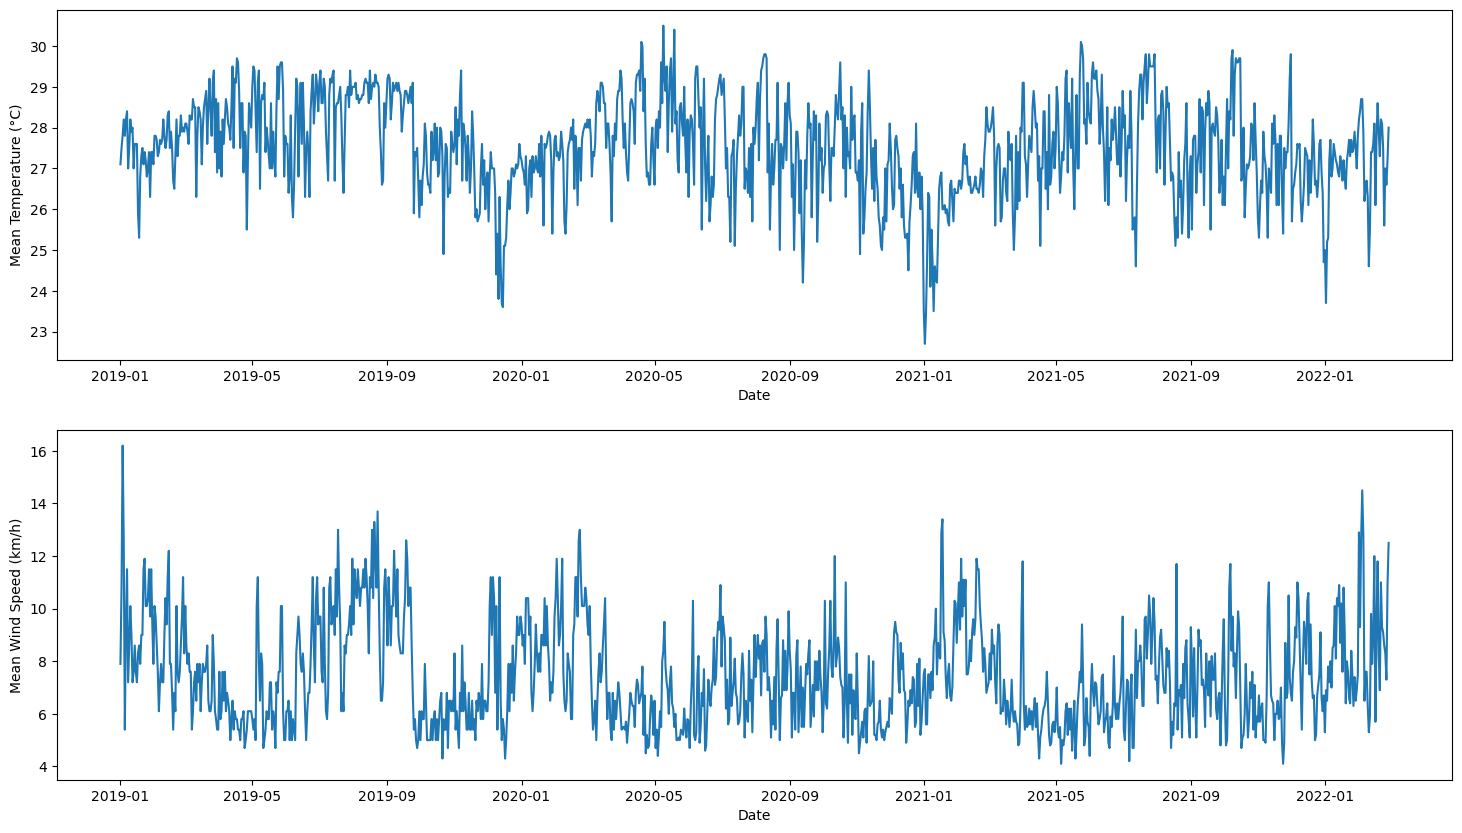

In [74]:
# Check for seasonality - which random forest cannot handle
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))

sns.lineplot(y = df["Mean Temperature (°C)"], x = df['Date'], ax=axes[0])
sns.lineplot(y = df["Mean Wind Speed (km/h)"], x = df['Date'], ax=axes[1])
plt.show()

In [77]:
def ADF_Cal(x):
    result = adfuller(x)
    ADF_stat = result[0]
    p = result[1]
    print(f"ADF Statistic: {ADF_stat}")
    print(f"p-value: {p}")
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print("{}% certain this is stationary".format(cert))
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))
print("Calculating ADF test for Mean Temperature (°C)...")
ADF_Cal(df["Mean Temperature (°C)"])
print()
print("Calculating ADF test for Mean Wind Speed (km/h)...")
ADF_Cal(df["Mean Wind Speed (km/h)"])

Calculating ADF test for Mean Temperature (°C)...
ADF Statistic: -8.37726043159983
p-value: 2.566194533120083e-13
Critical Values
	1%: -3.436
99.0% certain this is stationary
Reject H0: True

Calculating ADF test for Mean Wind Speed (km/h)...
ADF Statistic: -5.180103002780989
p-value: 9.652783691327831e-06
Critical Values
	1%: -3.436
99.0% certain this is stationary
Reject H0: True


In [78]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        date: date column of data
        agg: Pandas DataFrame of series framed for supervised learning.
    """
    date = data["Date"].to_frame()
    data = data.drop(["Date"], axis=1)
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = [], []
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f"{name} - {i}" for name in list(df)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f"{name}" for name in list(df)]
        else:
            names += [f"{name} + {i}" for name in list(df)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return date, agg

In [79]:
df_date, df = series_to_supervised(df, 6)
df

Daily Rainfall Total (mm) - 6  Mean Temperature (°C) - 6  \
6                          1.318063                       27.0   
7                          0.000000                       27.9   
8                          1.220108                       26.8   
9                          1.025306                       28.2   
10                         0.643453                       27.6   
11                         0.079181                       28.2   
12                         0.000000                       28.7   
13                         0.505150                       28.5   
14                         1.158362                       28.1   
15                         0.079181                       28.0   
16                         0.000000                       27.7   
17                         0.000000                       28.5   
18                         0.000000                       29.5   
19                         1.127105                       27.5   
20                         0.000000                       29.2   
21                         0.763428                       29.1   
22                         0.000000                       29.7   
23                         0.000000                       29.6   
24                         0.414973                       28.9   
25                         0.602060                       27.5   
26                         0.000000                       28.6   
27                         0.079181                       28.6   
28                         1.627366                       26.9   
29                         0.000000                       27.9   
30                         0.778151                       27.8   
31                         1.531479                       25.5   
32                         0.973128                       27.2   
33                         0.000000                       28.6   
34                         0.342423                       28.3   
35                         0.000000                       28.0   
36                         0.000000                       29.2   
37                         1.255273                       28.2   
38                         1.597695                       27.5   
39                         0.698970                       28.1   
40                         0.602060                       27.4   
41                         0.748188                       26.9   
42                         1.862131                       26.7   
43                         1.387390                       27.6   
44                         0.079181                       28.6   
45                         0.000000                       28.7   
46                         0.000000                       28.6   
47                         0.079181                       28.4   
48                         0.556303                       27.6   
49                         0.000000                       29.1   
50                         0.000000                       29.3   
51                         0.000000                       29.3   
52                         0.000000                       29.4   
53                         0.869232                       28.9   
54                         0.000000                       30.1   
55                         0.000000                       30.0   
56                         1.120574                       28.4   
57                         0.079181                       29.2   
58                         0.954243                       27.6   
59                         1.833784                       26.8   
60                         1.225309                       26.9   
61                         0.079181                       26.6   
62                         0.944483                       26.6   
63                         0.000000                       27.6   
64                         1.240549                       28.0   
65                         1.440909           

In [80]:
def random_forest_forecast(train, test):
    trainX, trainy = train.drop(["Daily Rainfall Total (mm)"], axis=1).to_numpy(), train["Daily Rainfall Total (mm)"].to_numpy()
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    testX = test.drop(["Daily Rainfall Total (mm)"], axis=1).to_numpy()
    yhat = model.predict(testX)
    return yhat

In [81]:
def walk_forward_validation(data, n_train=60, n_test=1):
    predictions = []
    actual = []
    for i in range(n_train, data.shape[0] - n_test):
        train, test = data.iloc[: i+1], data.iloc[i+1: i+1+n_test]
        yhat = random_forest_forecast(train, test)
        predictions.append(yhat)
        actual.append(test["Daily Rainfall Total (mm)"].to_numpy())
        for y, yhat in zip(actual[-n_test:], predictions[-n_test:]):
            print(f"Expected: {y}, Predicted: {yhat}")
    error = mean_absolute_error(actual, predictions)
    return error, actual, predictions

In [ ]:
mse, actual, predictions = walk_forward_validation(df)

In [87]:
train, test = df.iloc[:-31], df.iloc[-31:]
trainX, trainy = train.drop(["Daily Rainfall Total (mm)"], axis=1).to_numpy(), train["Daily Rainfall Total (mm)"].to_numpy()
testX, testy = test.drop(["Daily Rainfall Total (mm)"], axis=1).to_numpy(), test["Daily Rainfall Total (mm)"].to_numpy()
# Depth 10 seems to be okay in terms of error - to investigate further
model = RandomForestRegressor(n_estimators=1000, max_depth=10)
model.fit(trainX, trainy)
yhat = model.predict(testX)
mae = mean_absolute_error(testy, yhat)
print(f"Mean absolute error: {mae}")

Mean absolute error: 0.23585448620435995


In [ ]:
# Without normalising
fig, ax = plt.subplots(figsize=(30, 20))
ax.set_xlabel('Time Period', fontsize=30)
ax.set_ylabel('Total Rainfall (mm)', fontsize=30)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(30)
date_test = df_date.iloc[-31:]
plt.plot(testy, label='actual')
plt.plot(yhat, label='predicted')
plt.legend(prop={"size":30})
plt.show()

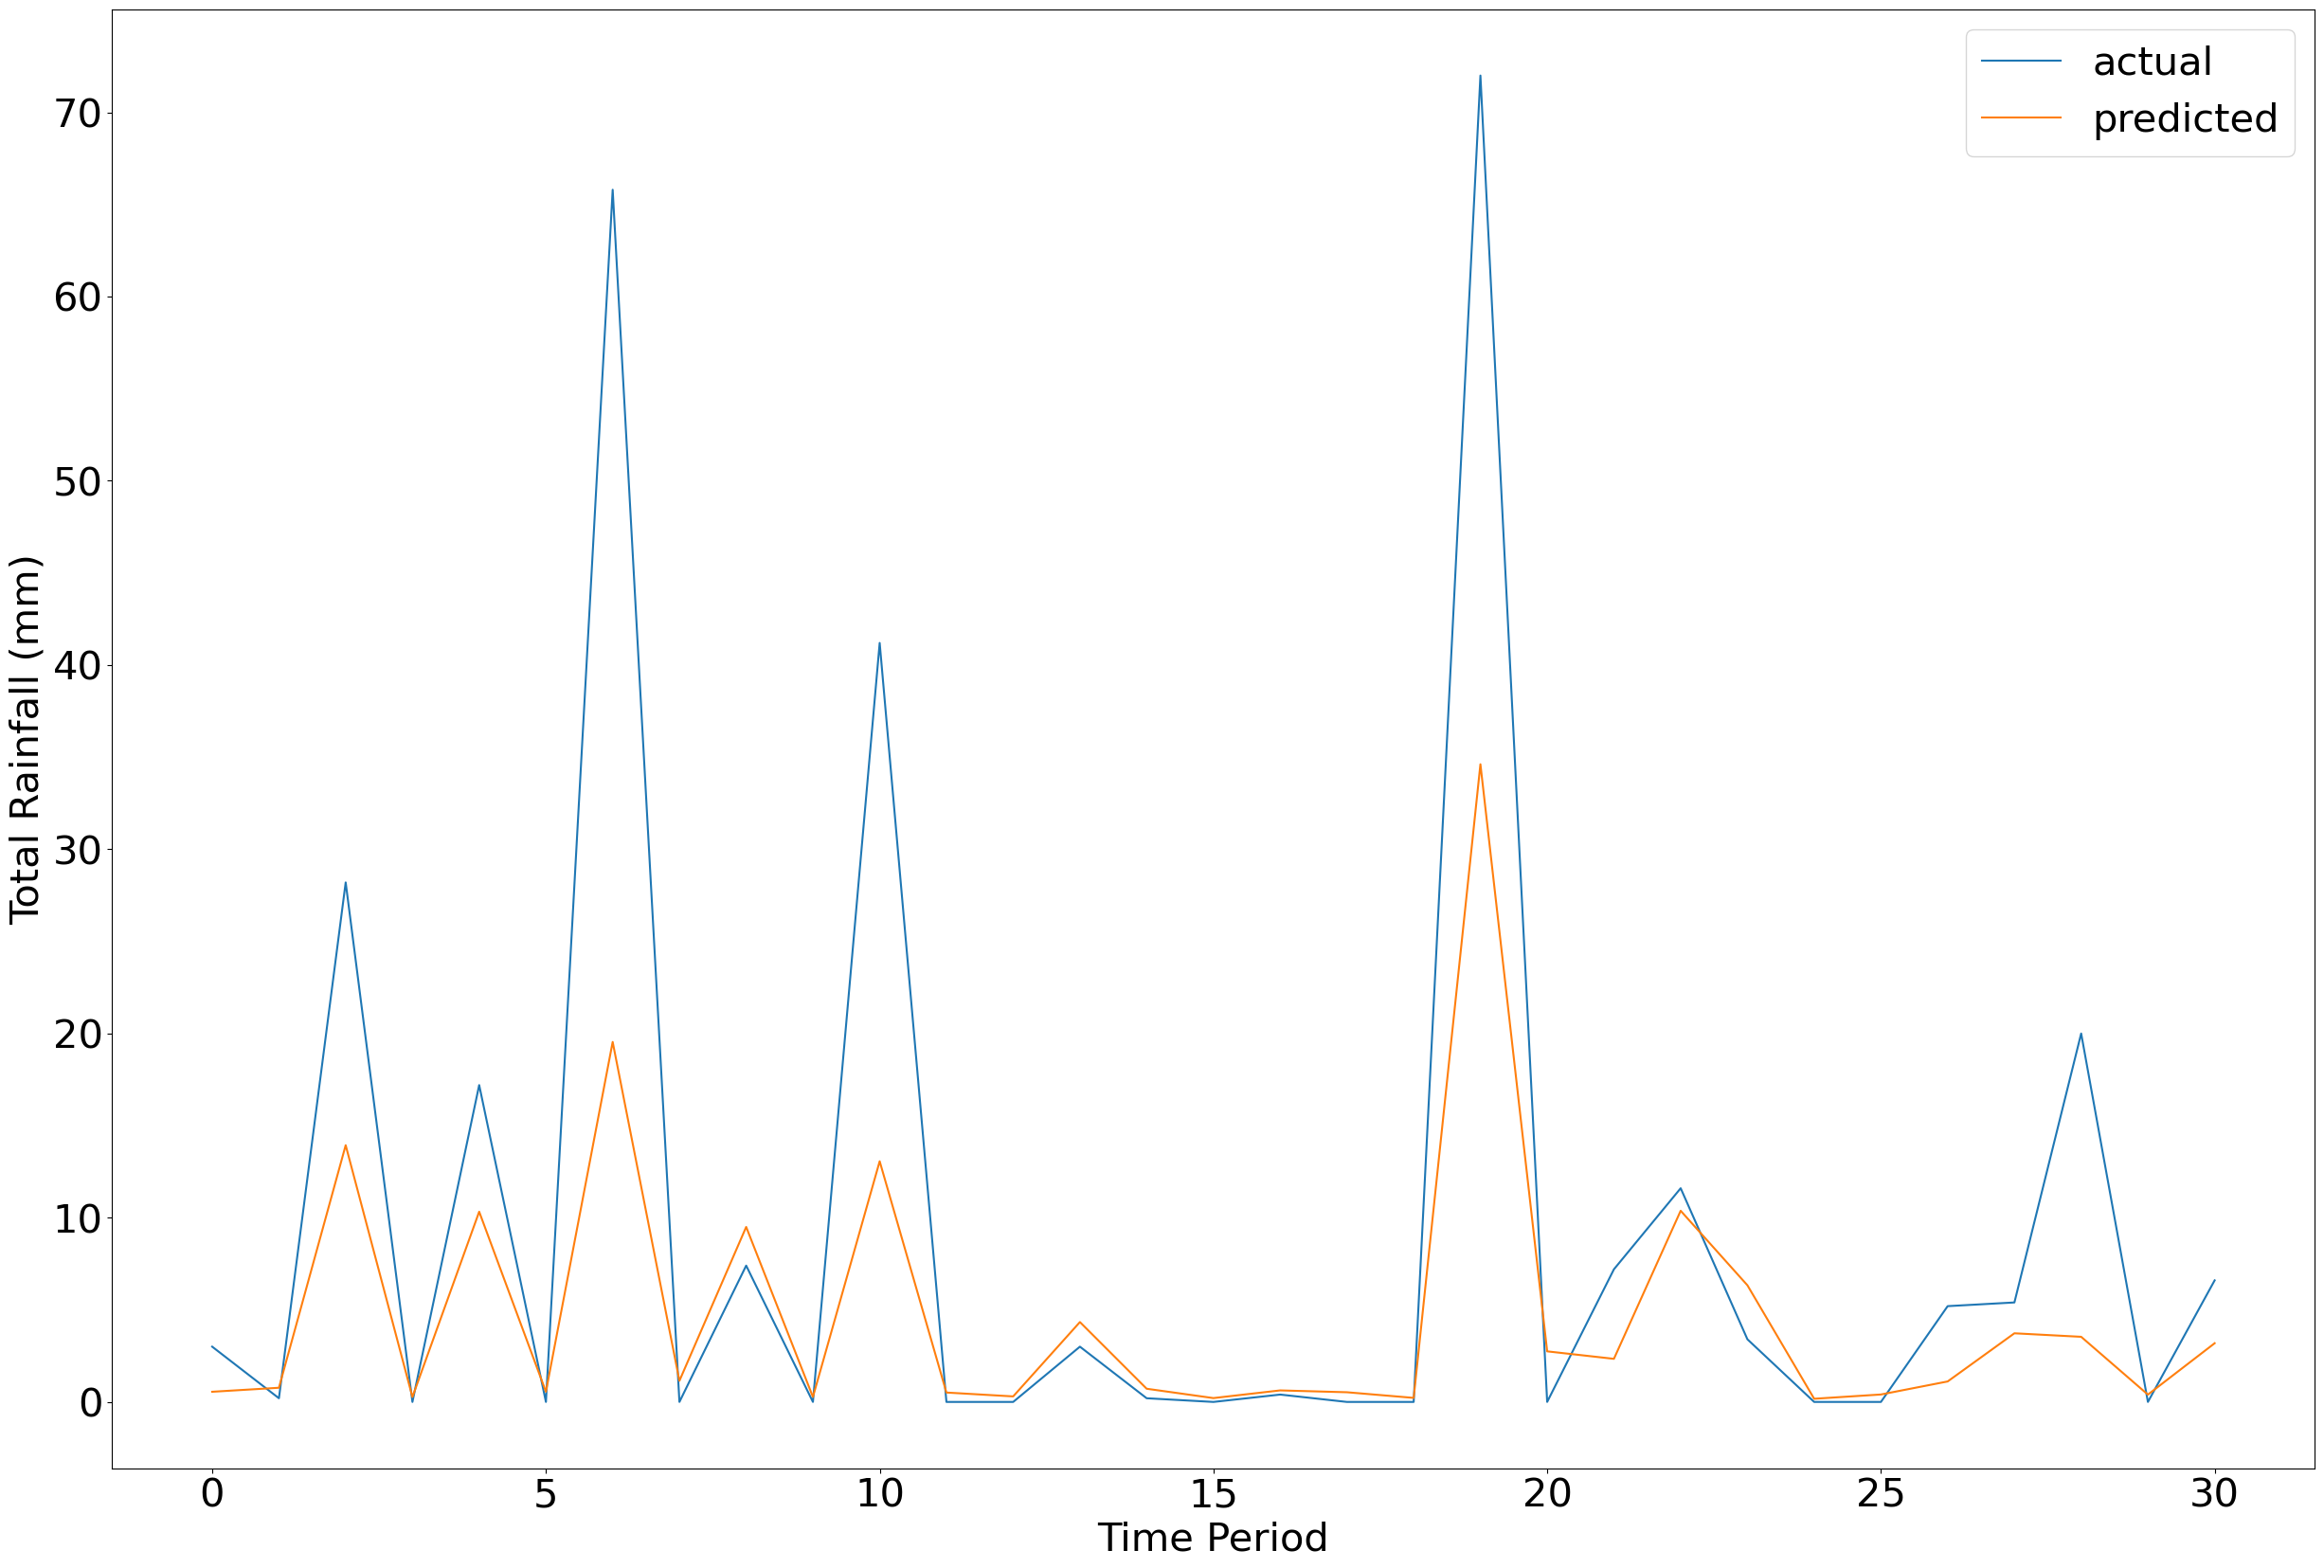

In [88]:
# with normalising total rainfall
# Interesting observations:
# 1. Model learnt quite well in predicting whether it will rain or not
# 2. Model seems to understand that lower rainfall in the past few days will result in heavier rain when it does rain
# 3. Model is less able to predict heavy rainfall when preceding days have rained
# 4. Model seems to be able to predict days where it does not rain very well
# 5. Model seems conservative in predicting rainfall - overfitting?
"""
To ask TA
1. For forecast, should we only train the model on past data rather than past data + current data
2. Does training model on greater range of data with accounting for seasonality help to improve model
3. Does normalising the output make sense (f(x) = log(x+1))
4. How to visualise trees - can we just print out some interesting trees and talk about them?
5. Whether building a website to predict rainfall a good idea for the project
"""
fig, ax = plt.subplots(figsize=(30, 20))
ax.set_xlabel('Time Period', fontsize=30)
ax.set_ylabel('Total Rainfall (mm)', fontsize=30)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(30)
date_test = df_date.iloc[-31:]
plt.plot(10**testy-1, label='actual')
plt.plot(10**yhat-1, label='predicted')
plt.legend(prop={"size":30})
plt.show()

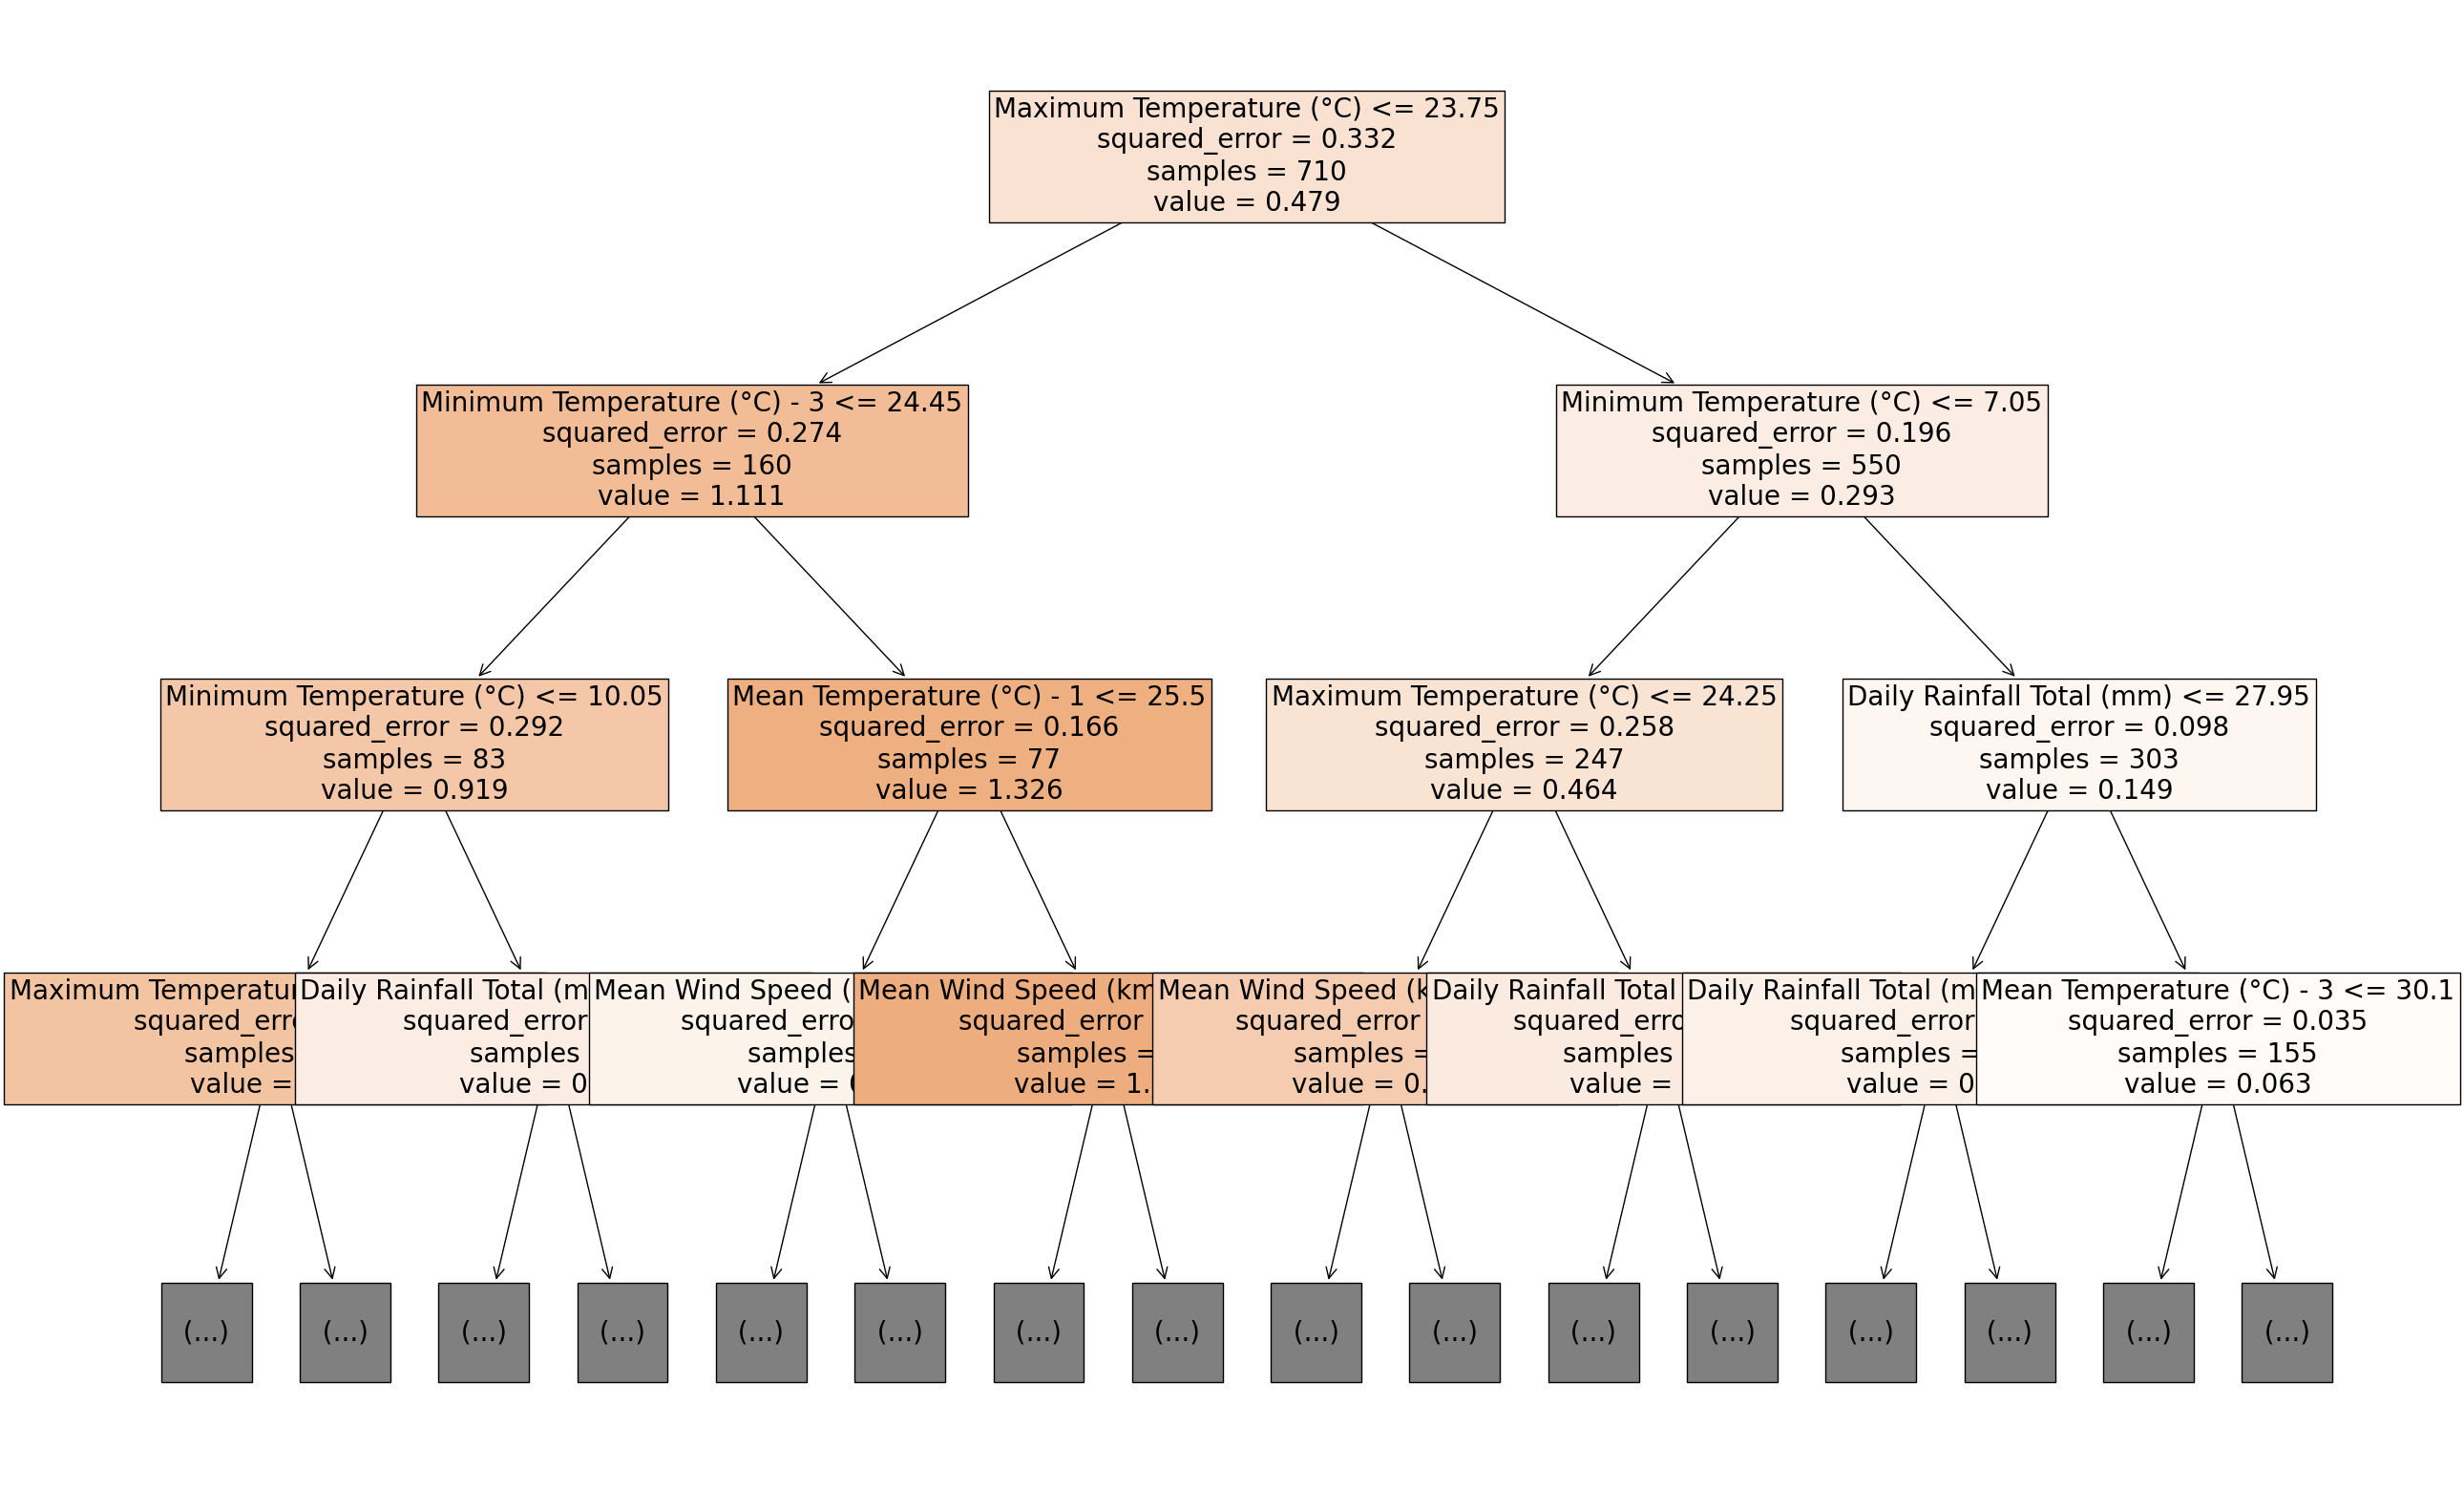

In [84]:
plt.subplots(figsize=(30, 20))
plot_tree(model.estimators_[0], max_depth=3, feature_names=df.columns, filled=True, fontsize=20)
plt.show()

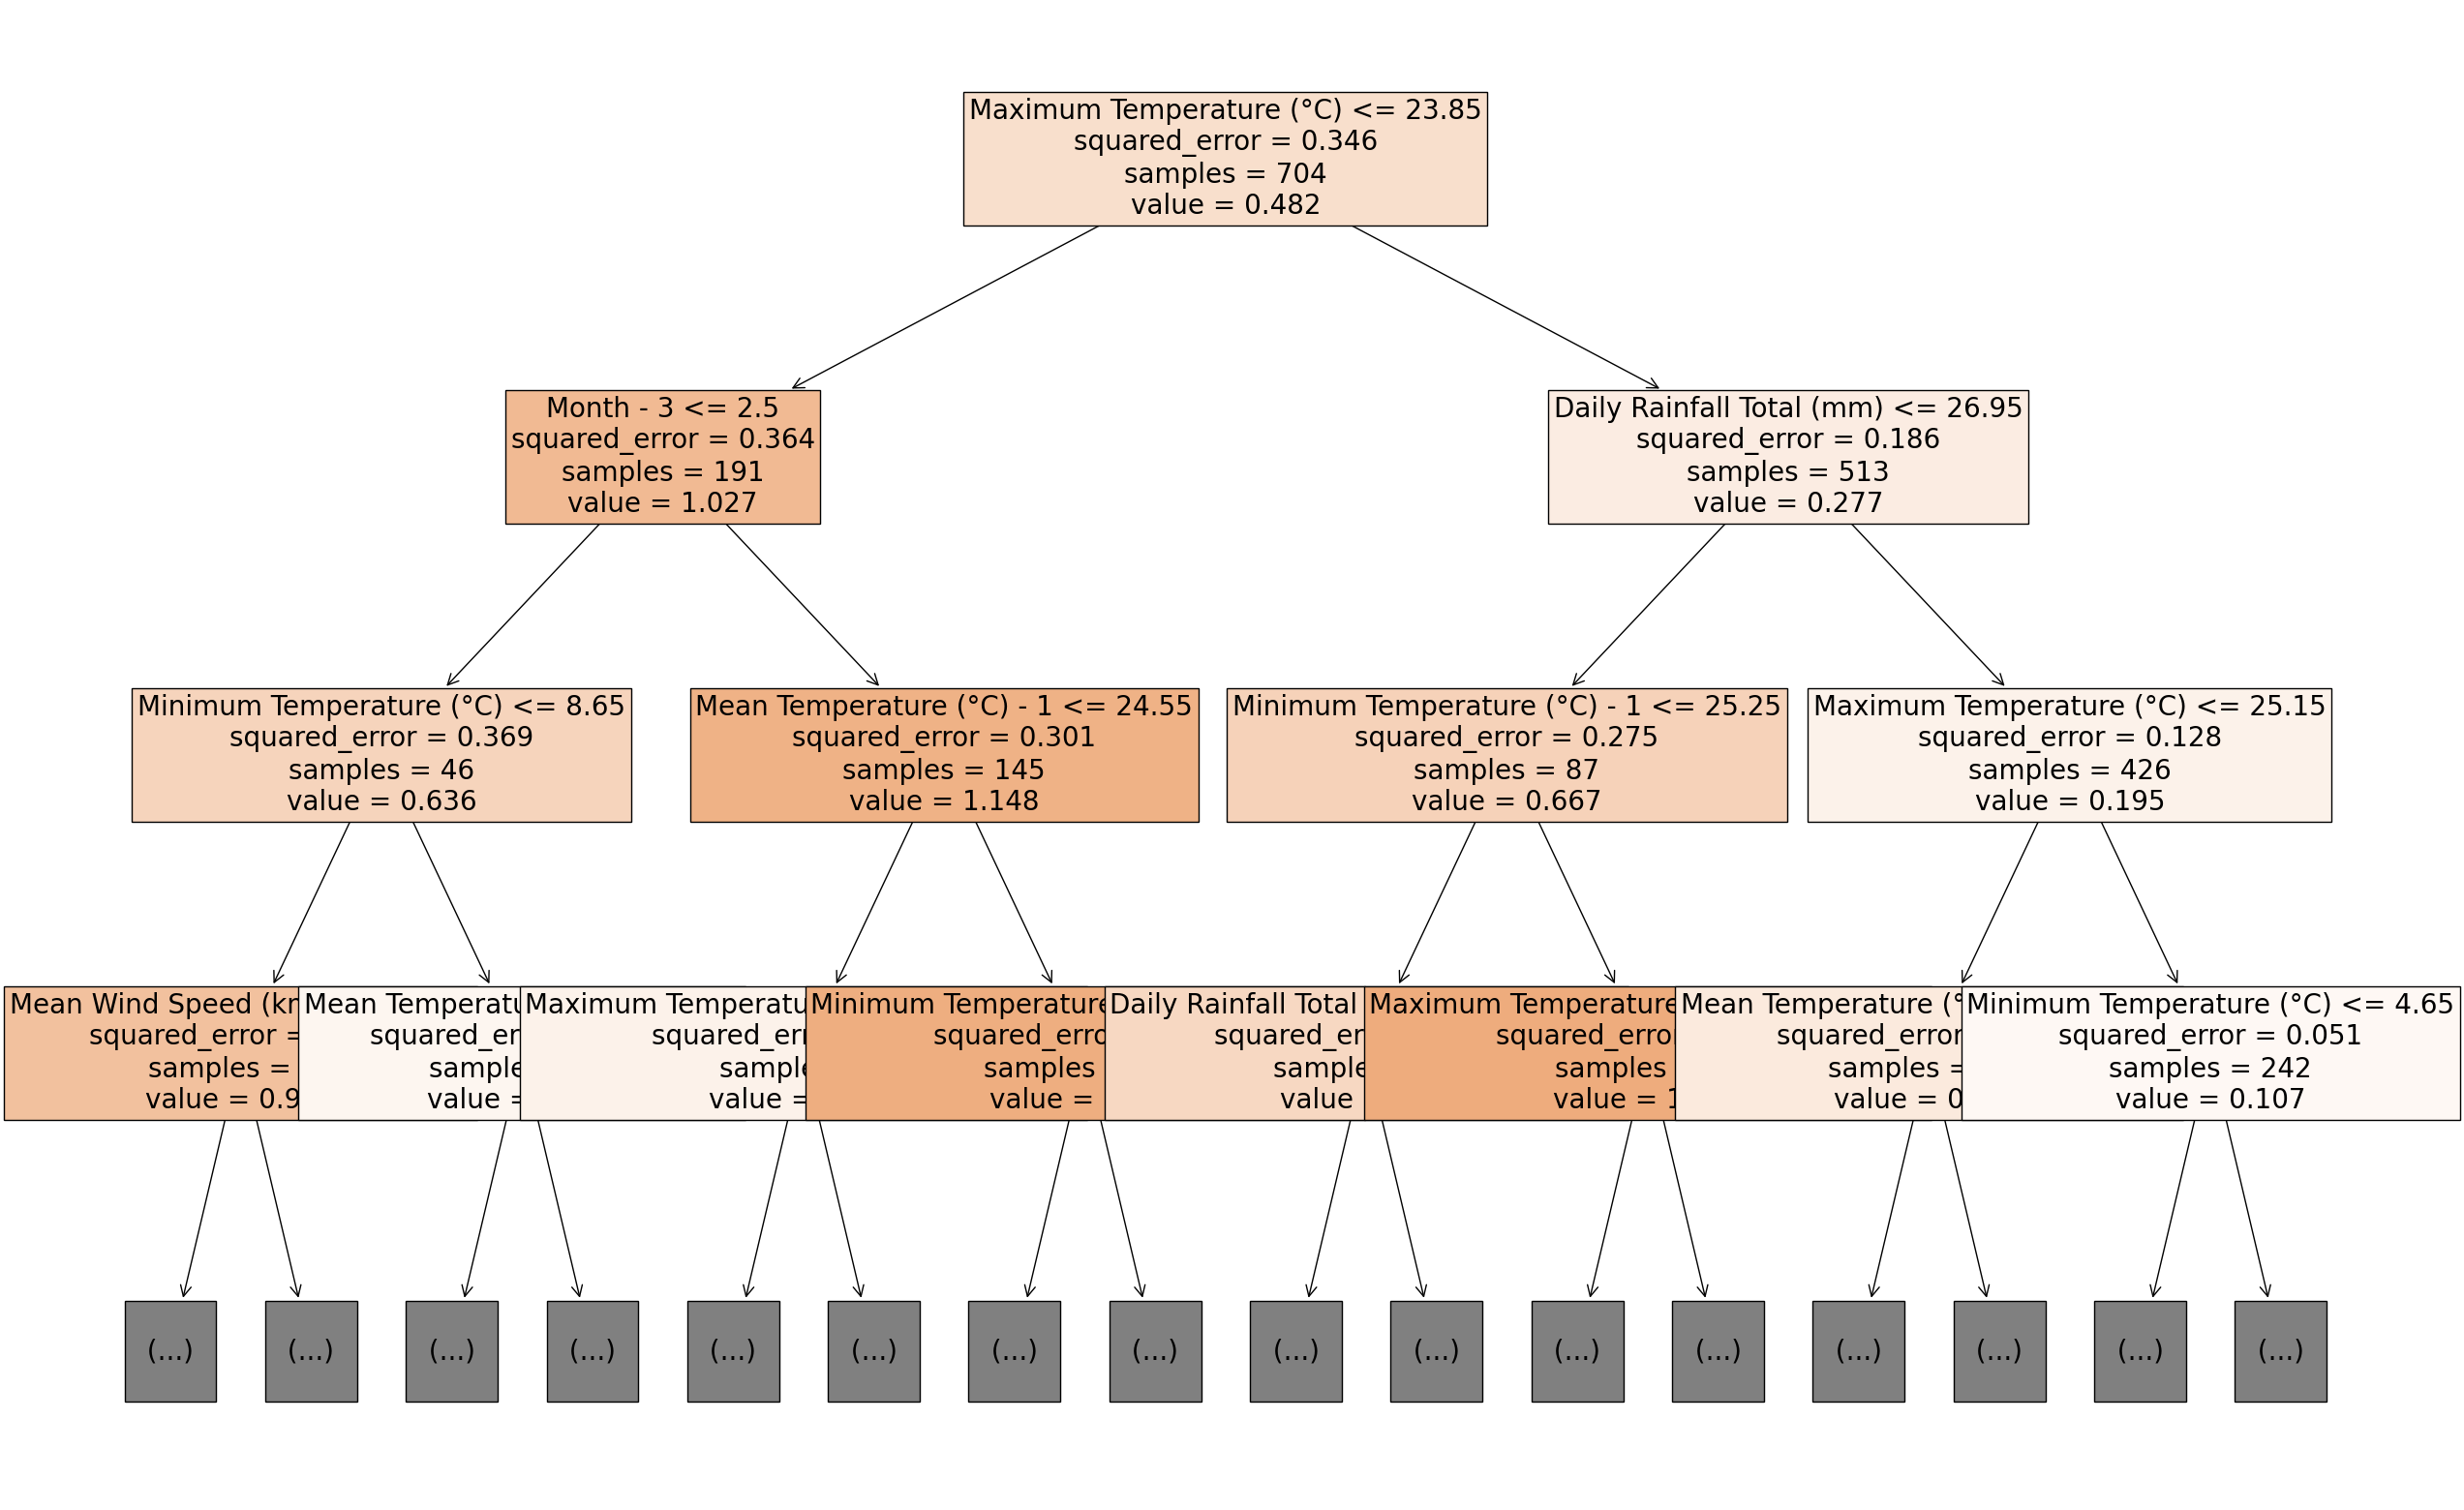

In [85]:
plt.subplots(figsize=(30, 20))
plot_tree(model.estimators_[1], max_depth=3, feature_names=df.columns, filled=True, fontsize=20)
plt.show()